# Introducción a Python aplicado a las Ciencias Sociales

### Talleres Introductorios Q-Lab 2024-II
### Encargadas: Lucía Cristina Díaz Sáenz (lucia.diaz@pucp.edu.pe) y Brisa Alejandra Cruz Pacheco (cruz.brisa@pucp.edu.pe)

## Objetivos de esta sesión

- Hacer mapas :)
  - Trabajaremos tres mapas: Uno a nivel departamental, otro a nivel distrital y otro a nivel Latinoamérica.

*Break: 6 a 6:10 pm*

# 1. Librerías

Hoy trabajaremos con pandas, geopandas, matplotib y contextily

In [ ]:
!pip install geopandas matplotlib contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 17.4 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import os
from google.colab import drive

Configuro drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Mapas") # Aquí configuro la carpeta como mi directorio

# 2. Datos

Hoy trabajaremos con archivos GeoPackage (gpkg) y Shapefile (.shp, .shx, .dbf).

Los archivos GeoPackage y Shapefile son formatos de archivo comúnmente utilizados para almacenar datos geoespaciales.

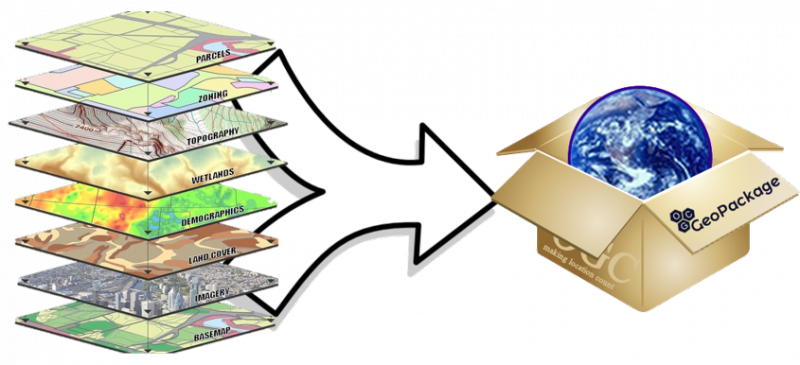

La mayor diferencia es que los archivos gpkg funcionan "por si solos": son archivos que contienen toda la información geoespacial.  


En cambio, los archivos Shapefile requieren de más archivos para funcionar. Por eso, se importa la carpeta completa. Un shapefile en realidad consiste en un mínimo de tres archivos obligatorios (.shp, .shx , y .dbf).

## ¿Cómo vamos a trabajar para hacer mapas?

1. Importamos los archivos con datos geoespaciales
2. Preparamos nuestros datos con las variables que nos interesan
3. Nos aseguramos que los 'id's sean igueales (la columna en común)
4. Mergeamos las dos bases
5. Graficamos!

# 3. Mapas

# 3.1. Población por departamento

Importamos un Geopackage con la información de los límites departamentales.

In [ ]:
# Reemplaza con tu ruta
gdf = gpd.read_file('Mapas/Departamento.gpkg')

Los obtuve de: https://www.geogpsperu.com/2014/03/base-de-datos-peru-shapefile-shp-minam.html

In [ ]:
gdf.head()

,DEPARTAMENTO,geometry
0,AMAZONAS,"MULTIPOLYGON (((-77.81211 -2.98962, -77.81000 ..."
1,ANCASH,"MULTIPOLYGON (((-77.64692 -8.05086, -77.64711 ..."
2,APURIMAC,"MULTIPOLYGON (((-73.74632 -13.17456, -73.74655..."
3,AREQUIPA,"MULTIPOLYGON (((-71.98109 -14.64062, -71.98142..."
4,AYACUCHO,"MULTIPOLYGON (((-74.34843 -12.17503, -74.34840..."


In [ ]:
print(gdf['geometry'][0])

MULTIPOLYGON (((-77.81210611199998 -2.989615345999937, -77.81000173699994 -2.9875108459999637, -77.80861598699994 -2.9861250959999666, -77.81294336199994 -2.987296846999925, -77.81419323699998 -2.9876387209999393, -77.81430861199993 -2.987751970999966, -77.81510736199994 -2.9879218459999493, -77.81791011199994 -2.9889472209999326, -77.81871098699997 -2.989117220999958, -77.81916011199996 -2.9893457209999497, -77.81967973699994 -2.9894589709999764, -77.81990823699994 -2.9896308459999545, -77.82241598699994 -2.990427721999936, -77.82253323699996 -2.9905409719999625, -77.82276173699995 -2.990540970999973, -77.82338673699996 -2.9908260969999674, -77.82938673699994 -2.9927617219999547, -77.82967386199994 -2.992931596999938, -77.83041398699999 -2.993101595999974, -77.83178711199997 -2.993671845999927, -77.83275586199994 -2.993898470999966, -77.83367186199996 -2.9942988459999356, -77.83389261199994 -2.9942968459999406, -77.83829486199994 -2.9958359709999627, -77.83955473699996 -2.996175845999

Es un conjunto de coordenadas!

Veamos los nombres de los departamentos

In [ ]:
gdf.nombdep

0          AMAZONAS
1            ANCASH
2          APURIMAC
3          AREQUIPA
4          AYACUCHO
5         CAJAMARCA
6            CALLAO
7             CUSCO
8      HUANCAVELICA
9           HUANUCO
10              ICA
11            JUNIN
12      LA LIBERTAD
13       LAMBAYEQUE
14             LIMA
15           LORETO
16    MADRE DE DIOS
17         MOQUEGUA
18            PASCO
19            PIURA
20             PUNO
21       SAN MARTIN
22            TACNA
23           TUMBES
24          UCAYALI
Name: nombdep, dtype: object

<Axes: >

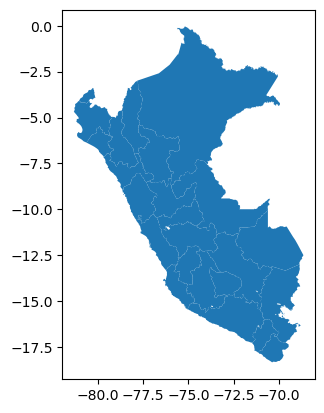

In [ ]:
gdf.plot()

Vamos a hacer un mapa de población del Perú.

La información la obtuve de Wikipedia: https://es.wikipedia.org/wiki/Departamentos_del_Per%C3%BA#Departamentos_del_Per%C3%BA



In [ ]:
peru_info = pd.read_csv('Mapas//Info_departamentos.csv')

In [ ]:
peru_info.head()

,DEPARTAMENTO,CAPITAL,CENSO_2017​,ESTIMACION_2022​,SUPERFICIE_KM
0,Amazonas,Chachapoyas,379384,429515,39200
1,Áncash,Huaraz,1083519,1194580,35900
2,Apurímac,Abancay,405759,429936,20900
3,Arequipa,Arequipa,1382730,1554251,63300
4,Ayacucho,Ayacucho,616176,670967,43800


Lo que vamos a querer hacer es unir esta información con la información geográfica mediante un MERGE. Por esto, voy a renombrar la columna con el nombre del departamento para que sea igual.

In [ ]:
# Renombramos el nombre de la columna

gdf = gdf.rename(columns={"nombdep":"DEPARTAMENTO"})

In [ ]:
gdf.head()

,objectid,ccdd,DEPARTAMENTO,fuente,tematica,id_geografia,geometry
0,1,01,AMAZONAS,INEI - CPV2017 RESULTADOS,T10,2010000,"MULTIPOLYGON (((-77.81211 -2.98962, -77.81000 ..."
1,2,02,ANCASH,INEI - CPV2017 RESULTADOS,T10,2020000,"MULTIPOLYGON (((-77.64692 -8.05086, -77.64711 ..."
2,3,03,APURIMAC,INEI - CPV2017 RESULTADOS,T10,2030000,"MULTIPOLYGON (((-73.74632 -13.17456, -73.74655..."
3,4,04,AREQUIPA,INEI - CPV2017 RESULTADOS,T10,2040000,"MULTIPOLYGON (((-71.98109 -14.64062, -71.98142..."
4,5,05,AYACUCHO,INEI - CPV2017 RESULTADOS,T10,2050000,"MULTIPOLYGON (((-74.34843 -12.17503, -74.34840..."


Solo quiero dos cosas del gdf: el 'id' por el que uniré ("DEPARTAMENTO") y los datos geográficos.

In [ ]:
# Nos quedamos solo con dos columnas

gdf = gdf.loc[: , ["DEPARTAMENTO", "geometry"]]

In [ ]:
gdf.head()

,DEPARTAMENTO,geometry
0,AMAZONAS,"MULTIPOLYGON (((-77.81211 -2.98962, -77.81000 ..."
1,ANCASH,"MULTIPOLYGON (((-77.64692 -8.05086, -77.64711 ..."
2,APURIMAC,"MULTIPOLYGON (((-73.74632 -13.17456, -73.74655..."
3,AREQUIPA,"MULTIPOLYGON (((-71.98109 -14.64062, -71.98142..."
4,AYACUCHO,"MULTIPOLYGON (((-74.34843 -12.17503, -74.34840..."


Con MERGE, solo se unirán las columnas iguales. Entonces, hay que asegurarnos que tengan el mismo formato.

**PUNTOS EXTRA:** ¿Qué errores podrían ser comunes cuando vemos el formato de nombres de departamentos? 🤔

In [ ]:
# Necesitamos que departamento esté en el mismo formato

peru_info['DEPARTAMENTO'] = peru_info['DEPARTAMENTO'].str.upper()

In [ ]:
peru_info.head()

,DEPARTAMENTO,CAPITAL,CENSO_2017​,ESTIMACION_2022​,SUPERFICIE_KM
0,AMAZONAS,Chachapoyas,379384,429515,39200
1,ÁNCASH,Huaraz,1083519,1194580,35900
2,APURÍMAC,Abancay,405759,429936,20900
3,AREQUIPA,Arequipa,1382730,1554251,63300
4,AYACUCHO,Ayacucho,616176,670967,43800


In [ ]:
print(list(peru_info['DEPARTAMENTO']))

['AMAZONAS', 'ÁNCASH', 'APURÍMAC', 'AREQUIPA', 'AYACUCHO', 'CAJAMARCA', 'CALLAO\u200b', 'CUZCO', 'HUANCAVELICA', 'HUÁNUCO', 'ICA', 'JUNÍN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO', 'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO', 'SAN MARTÍN', 'TACNA', 'TUMBES', 'UCAYALI']


In [ ]:
# Reemplazamos las tildes, el formato extraño de "CALLAO" y "CUZCO"

peru_info["DEPARTAMENTO"] = peru_info["DEPARTAMENTO"].str.replace("Á","A")
peru_info["DEPARTAMENTO"] = peru_info["DEPARTAMENTO"].str.replace("Í","I")
peru_info["DEPARTAMENTO"] = peru_info["DEPARTAMENTO"].str.replace("CALLAO\u200b","CALLAO")
peru_info["DEPARTAMENTO"] = peru_info["DEPARTAMENTO"].str.replace("CUZCO","CUSCO")

peru_info.DEPARTAMENTO

,DEPARTAMENTO
0,AMAZONAS
1,ANCASH
2,APURIMAC
3,AREQUIPA
4,AYACUCHO
5,CAJAMARCA
6,CALLAO
7,CUZCO
8,HUANCAVELICA
9,HUANUCO


In [ ]:
peru_info.columns

Index(['DEPARTAMENTO', 'CAPITAL', 'CENSO_2017​', 'ESTIMACION_2022​',
       'SUPERFICIE_KM'],
      dtype='object')

In [ ]:
peru_info.head()

,DEPARTAMENTO,CAPITAL,CENSO_2017​,ESTIMACION_2022​,SUPERFICIE_KM
0,AMAZONAS,Chachapoyas,379384,429515,39200
1,ANCASH,Huaraz,1083519,1194580,35900
2,APURIMAC,Abancay,405759,429936,20900
3,AREQUIPA,Arequipa,1382730,1554251,63300
4,AYACUCHO,Ayacucho,616176,670967,43800


Para tener los datos más claros, reemplazaremos "ESTIMACIÓN_2022" CON "POBLACION".

In [ ]:
peru_info = peru_info.rename(columns={"ESTIMACION_2022​":"POBLACION"})

In [ ]:
peru_info.head()

,DEPARTAMENTO,CAPITAL,CENSO_2017​,POBLACION,SUPERFICIE_KM
0,AMAZONAS,Chachapoyas,379384,429515,39200
1,ANCASH,Huaraz,1083519,1194580,35900
2,APURIMAC,Abancay,405759,429936,20900
3,AREQUIPA,Arequipa,1382730,1554251,63300
4,AYACUCHO,Ayacucho,616176,670967,43800


# Unimos dfs (Merge)

In [ ]:
# Revisemos los 'id' (departamento)

gdf.DEPARTAMENTO

,DEPARTAMENTO
0,AMAZONAS
1,ANCASH
2,APURIMAC
3,AREQUIPA
4,AYACUCHO
5,CAJAMARCA
6,CALLAO
7,CUSCO
8,HUANCAVELICA
9,HUANUCO


In [ ]:
peru_info.DEPARTAMENTO

,DEPARTAMENTO
0,AMAZONAS
1,ANCASH
2,APURIMAC
3,AREQUIPA
4,AYACUCHO
5,CAJAMARCA
6,CALLAO
7,CUZCO
8,HUANCAVELICA
9,HUANUCO


In [ ]:
peru_merged = pd.merge(gdf, peru_info)

Verifico que esten los 25 departamentos

In [ ]:
peru_merged.DEPARTAMENTO

0          AMAZONAS
1            ANCASH
2          APURIMAC
3          AREQUIPA
4          AYACUCHO
5         CAJAMARCA
6             CUSCO
7      HUANCAVELICA
8           HUANUCO
9               ICA
10            JUNIN
11      LA LIBERTAD
12       LAMBAYEQUE
13             LIMA
14           LORETO
15    MADRE DE DIOS
16         MOQUEGUA
17            PASCO
18            PIURA
19             PUNO
20       SAN MARTIN
21            TACNA
22           TUMBES
23          UCAYALI
Name: DEPARTAMENTO, dtype: object

Uso .plot para graficar y señalo la columna "POBLACION"

<Axes: >

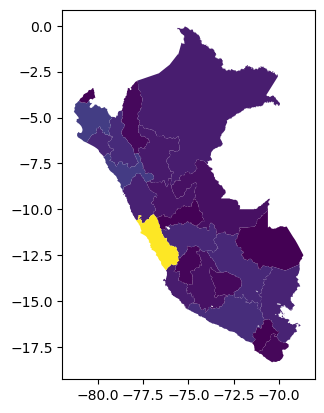

In [ ]:
peru_merged.plot(column="POBLACION")

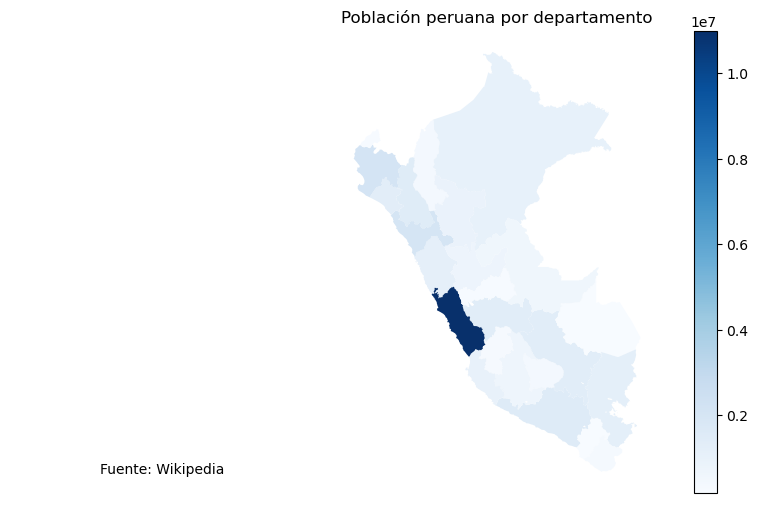

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,6)) #Se crea 1 figura de tamaño 10,6; un eje y un gráfico
peru_merged.plot(column = "POBLACION", ax=ax, #ax es el eje que acabo de crear
                 cmap = "Blues", legend = True) #Establezco paleta de colores y agrego leyenda
ax.axis("off") # Desactivo los ejes alrededor del mapa
ax.set_title("Población peruana por departamento")
ax.annotate("Fuente: Wikipedia",
            xy = (0.1, 0.1), xycoords = "figure fraction", #Posicionan la anotación al 10% del tamaño total de la figura desde el borde izquierdo y el borde inferior.
            horizontalalignment = "left",
            verticalalignment = "top")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

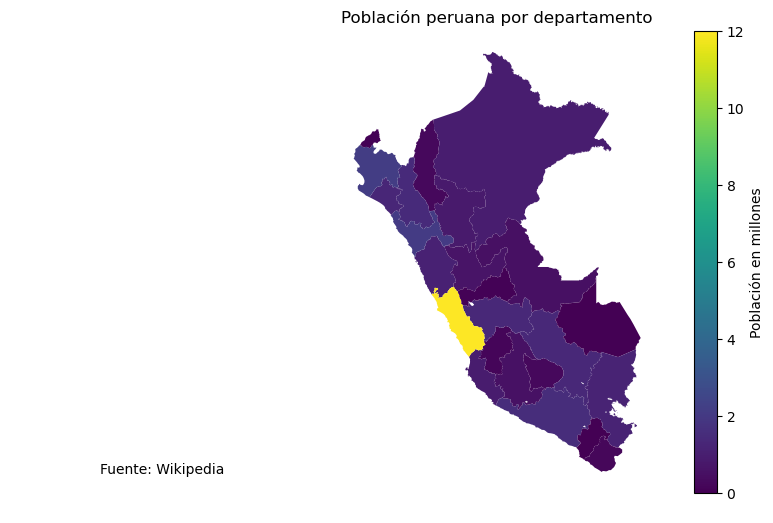

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,6))
peru_merged.plot(column = "POBLACION", ax=ax,
                 cmap = "viridis") #Establezco paleta de colores y NO agrego leyenda
ax.axis("off")
ax.set_title("Población peruana por departamento")
ax.annotate("Fuente: Wikipedia",
            xy = (0.1, 0.1), xycoords = "figure fraction",
            horizontalalignment = "left",
            verticalalignment = "top")

# Leyenda (Aquí personalizo)
sm = plt.cm.ScalarMappable(cmap = "viridis",
                           norm = plt.Normalize(vmin=0,
                                                vmax=12)) #Creo este objeto para mapear los colores, según los valores

# Vacío para el data range

sm._A = [] # Prepara el ScalarMappable para usar en una leyenda.

# Añadimos la barra de colores

cbar = fig.colorbar(sm, label = "Población en millones", ax=ax)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

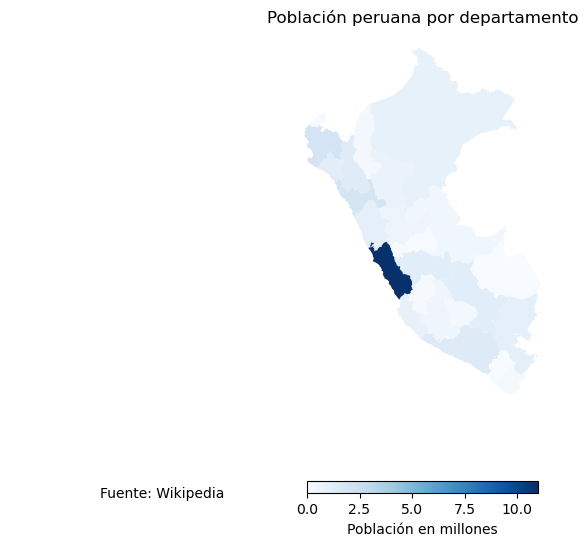

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,6))
peru_merged.plot(column = "POBLACION", ax=ax,
                 cmap = "Blues") #Establezco paleta de colores y NO agrego leyenda
ax.axis("off")
ax.set_title("Población peruana por departamento")
ax.annotate("Fuente: Wikipedia",
            xy = (0.1, 0.1), xycoords = "figure fraction",
            horizontalalignment = "left",
            verticalalignment = "top")

# Leyenda
sm = plt.cm.ScalarMappable(cmap = "Blues",
                           norm = plt.Normalize(vmin=0,
                                                vmax=11))

# Vacío para el data range

sm._A = []

# Añadimos la barra de colores

cbar = fig.colorbar(sm, label = "Población en millones", ax=ax,
                    orientation ="horizontal",
                    fraction=0.025)

plt.show

In [ ]:
fig.savefig("Peru_poblacion.png", dpi=300)

# 3.2. IDH por distritos de Cusco

# Trabajamos con la base de datos de la Clase 3

Importo base de datos de IDH

In [ ]:
# importamos el documento cuyo formato es csv

IDH_CUSCO = pd.read_csv('Mapas/IDH_CUSCO_2003_2017.csv')
IDH_2017 = IDH_CUSCO[IDH_CUSCO['YEAR'] == 2017]

In [ ]:
IDH_2017

,YEAR,PROVINCIA,DISTRITO,UBIGEO,HABITANTES,IDH,ESP_VIDA,SEC_COMPLETA_PORC,EDUC_YEARS,INGRESO_PERC_SOLES
672,2017,Cusco,Cusco,80101,114.630,"0,6096","74,65","79,71","10,96","975,97"
673,2017,Cusco,Ccorca,80102,2.246,"0,2344","65,71","57,49","2,91","255,75"
674,2017,Cusco,Poroy,80103,2.436,"0,5084","71,72","70,72","7,57","810,84"
675,2017,Cusco,San Jeronimo,80104,57.075,"0,6030","80,71","77,28","10,15","898,56"
676,2017,Cusco,San Sebastian,80105,112.536,"0,6254","78,43","81,25","10,78","979,94"
...,...,...,...,...,...,...,...,...,...,...
779,2017,Urubamba,Huayllabamba,81303,5.499,"0,4613","74,60","76,94","7,97","541,15"
780,2017,Urubamba,Machupicchu,81304,5.347,"0,7163","81,61","71,60","10,46","1.487,88"
781,2017,Urubamba,Maras,81305,5.946,"0,3023","75,32","52,76","4,86","276,10"
782,2017,Urubamba,Ollantaytambo,81306,10.165,"0,4265","71,84","65,27","6,07","588,05"


Importo archivo shapefile (carpeta da varios archivos) con los límites distritales

In [ ]:
gdf_distrital = gpd.read_file("Mapas/Distrital INEI 2023 geogpsperu SuyoPomalia")

In [ ]:
gdf_distrital

,UBIGEO,CCDD,CCPP,CCDI,DEPARTAMEN,PROVINCIA,DISTRITO,OBJECTID,ESRI_OID,geometry
0,010101,01,01,01,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,1.0,1.0,"POLYGON ((-77.8858 -6.1778, -77.88323 -6.17846..."
1,010102,01,01,02,AMAZONAS,CHACHAPOYAS,ASUNCION,2.0,2.0,"POLYGON ((-77.74482 -5.94497, -77.74482 -5.945..."
2,010103,01,01,03,AMAZONAS,CHACHAPOYAS,BALSAS,3.0,3.0,"POLYGON ((-77.9358 -6.69039, -77.93531 -6.6909..."
3,010104,01,01,04,AMAZONAS,CHACHAPOYAS,CHETO,4.0,4.0,"POLYGON ((-77.71486 -6.24598, -77.71485 -6.245..."
4,010105,01,01,05,AMAZONAS,CHACHAPOYAS,CHILIQUIN,5.0,5.0,"POLYGON ((-77.77405 -5.99598, -77.77328 -5.996..."
...,...,...,...,...,...,...,...,...,...,...
1886,250304,25,03,04,UCAYALI,PADRE ABAD,NESHUYA,1887.0,1887.0,"POLYGON ((-75.01663 -8.44514, -75.0165 -8.4453..."
1887,250305,25,03,05,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,1888.0,1888.0,"POLYGON ((-75.02136 -8.73948, -75.02136 -8.739..."
1888,250306,25,03,06,UCAYALI,PADRE ABAD,HUIPOCA,1889.0,1889.0,"POLYGON ((-75.3844 -8.58229, -75.38423 -8.5825..."
1889,250307,25,03,07,UCAYALI,PADRE ABAD,BOQUERON,1890.0,1890.0,"POLYGON ((-75.77583 -8.91013, -75.77427 -8.910..."


Para preparar los datos para el merge, ahora usaremos UBIGEO. Es importante que estén las dos columnas con el mismo tipo de dato.

In [ ]:
IDH_2017["UBIGEO"].dtype

dtype('int64')

In [ ]:
gdf_distrital["UBIGEO"].dtype

dtype('O')

In [ ]:
gdf_distrital["UBIGEO"] = gdf_distrital["UBIGEO"].str.strip()
gdf_distrital["UBIGEO"] = pd.to_numeric(gdf_distrital["UBIGEO"], errors='coerce')

# Comprobamos la conversión
print(gdf_distrital["UBIGEO"].dtype)

int64


Listo! Los datos ahora están en int64

Si quiero gráficar una escala como en los gráficos anteriores, mi variable también tiene que ser numérica

In [ ]:
IDH_2017['IDH'].dtype

dtype('O')

In [ ]:
# Primero, asegurémonos de eliminar cualquier espacio en blanco que pueda estar alrededor de los strings
IDH_2017['IDH'] = IDH_2017['IDH'].str.strip()

# Reemplazar comas por puntos si es necesario (dependiendo del formato decimal)
IDH_2017['IDH'] = IDH_2017['IDH'].str.replace(',', '.')

# Convertir la columna 'IDH' a valores numéricos, manejando errores con 'coerce' que convertirá los no convertibles a NaN
IDH_2017['IDH'] = pd.to_numeric(IDH_2017['IDH'], errors='coerce')

# Comprobamos la conversión
print(IDH_2017['IDH'].dtype)

float64


C:\Users\Lucía\AppData\Local\Temp\ipykernel_5916\4225198102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDH_2017['IDH'] = IDH_2017['IDH'].str.strip()
C:\Users\Lucía\AppData\Local\Temp\ipykernel_5916\4225198102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDH_2017['IDH'] = IDH_2017['IDH'].str.replace(',', '.')
C:\Users\Lucía\AppData\Local\Temp\ipykernel_5916\4225198102.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Listo! Unimos los dfs

In [ ]:
IDH_merged = pd.merge(gdf_distrital, IDH_2017, on="UBIGEO")

In [ ]:
IDH_merged

,UBIGEO,CCDD,CCPP,CCDI,DEPARTAMEN,PROVINCIA_x,DISTRITO_x,OBJECTID,ESRI_OID,geometry,YEAR,PROVINCIA_y,DISTRITO_y,HABITANTES,IDH,ESP_VIDA,SEC_COMPLETA_PORC,EDUC_YEARS,INGRESO_PERC_SOLES
0,80101,08,01,01,CUSCO,CUSCO,CUSCO,703.0,703.0,"POLYGON ((-71.97936 -13.43023, -71.97841 -13.4...",2017,Cusco,Cusco,114.630,0.6096,"74,65","79,71","10,96","975,97"
1,80102,08,01,02,CUSCO,CUSCO,CCORCA,704.0,704.0,"POLYGON ((-72.06146 -13.52794, -72.06077 -13.5...",2017,Cusco,Ccorca,2.246,0.2344,"65,71","57,49","2,91","255,75"
2,80103,08,01,03,CUSCO,CUSCO,POROY,705.0,705.0,"POLYGON ((-72.00909 -13.46649, -72.00945 -13.4...",2017,Cusco,Poroy,2.436,0.5084,"71,72","70,72","7,57","810,84"
3,80104,08,01,04,CUSCO,CUSCO,SAN JERONIMO,706.0,706.0,"POLYGON ((-71.84917 -13.48673, -71.8479 -13.48...",2017,Cusco,San Jeronimo,57.075,0.6030,"80,71","77,28","10,15","898,56"
4,80105,08,01,05,CUSCO,CUSCO,SAN SEBASTIAN,707.0,707.0,"POLYGON ((-71.93042 -13.46831, -71.92988 -13.4...",2017,Cusco,San Sebastian,112.536,0.6254,"78,43","81,25","10,78","979,94"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,81303,08,13,03,CUSCO,URUBAMBA,HUAYLLABAMBA,814.0,814.0,"POLYGON ((-72.04735 -13.26473, -72.04686 -13.2...",2017,Urubamba,Huayllabamba,5.499,0.4613,"74,60","76,94","7,97","541,15"
108,81304,08,13,04,CUSCO,URUBAMBA,MACHUPICCHU,815.0,815.0,"POLYGON ((-72.54071 -13.08273, -72.53975 -13.0...",2017,Urubamba,Machupicchu,5.347,0.7163,"81,61","71,60","10,46","1.487,88"
109,81305,08,13,05,CUSCO,URUBAMBA,MARAS,816.0,816.0,"POLYGON ((-72.21609 -13.27408, -72.21493 -13.2...",2017,Urubamba,Maras,5.946,0.3023,"75,32","52,76","4,86","276,10"
110,81306,08,13,06,CUSCO,URUBAMBA,OLLANTAYTAMBO,817.0,817.0,"POLYGON ((-72.18959 -13.09626, -72.18879 -13.0...",2017,Urubamba,Ollantaytambo,10.165,0.4265,"71,84","65,27","6,07","588,05"


<function matplotlib.pyplot.show(close=None, block=None)>

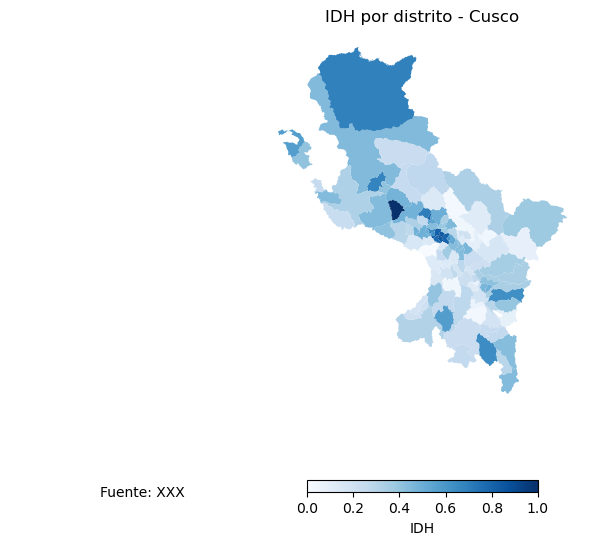

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,6))
IDH_merged.plot(column = "IDH", ax=ax,
                 cmap = "Blues")
ax.axis("off")
ax.set_title("IDH por distrito - Cusco")
ax.annotate("Fuente: PNUD e IPE",
            xy = (0.1, 0.1), xycoords = "figure fraction",
            horizontalalignment = "left",
            verticalalignment = "top")

# Leyenda
sm = plt.cm.ScalarMappable(cmap = "Blues",
                           norm = plt.Normalize(vmin=0,
                                                vmax=1))

# Vacío para el data range

sm._A = []

# Añadimos la barra de colores

cbar = fig.colorbar(sm, label = "IDH", ax=ax,
                    orientation ="horizontal",
                    fraction=0.025)

plt.show

# Latinobarómetro

De nuevo trabajaremos con un shapefile (carpeta). La información la obtuve de: https://hub.arcgis.com/datasets/ad61dcd7dd244d4096c22a49cc97011f/about

In [ ]:
gdf_mundo = gpd.read_file('Mapas/shp_mapa_paises_mundo_2014')

In [ ]:
gdf_mundo.head()

,CNTR_ID,COUNTRY,PAIS,SHAPE_LENG,SHAPE_AREA,geometry
0,YE,Yemen,Yemen,36.626553,38.255732,"MULTIPOLYGON (((52.81230 17.28550, 53.10706 16..."
1,ZA,South Africa,Sudáfrica,71.900817,113.192432,"MULTIPOLYGON (((29.76376 -22.14108, 30.01108 -..."
2,ZM,Zambia,Zambia,51.025258,62.726268,"POLYGON ((30.80741 -8.31065, 31.01054 -8.57650..."
3,ZW,Zimbabwe,Zimbabue,27.031247,33.525067,"POLYGON ((30.41826 -15.61757, 30.42459 -16.000..."
4,AD,Andorra,Andorra,1.044590,0.051134,"POLYGON ((1.72580 42.50440, 1.65693 42.46822, ..."


¿Qué ocurre si ploteo todo el df?

<Axes: >

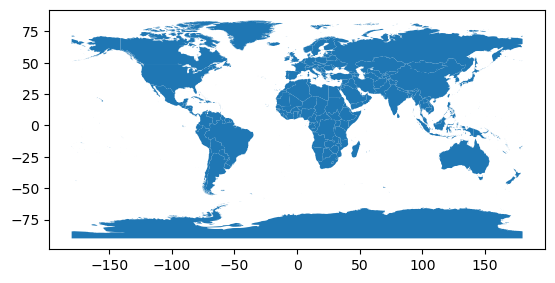

In [ ]:
gdf_mundo.plot()

No necesitamos más que el 'id' y los datos geoespaciales.

In [ ]:
# Nos quedamos solo con dos columnas

gdf_mundo = gdf_mundo.loc[: , ["COUNTRY", "geometry"]]

In [ ]:
!pip install pyreadstat

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
    --------------------------------------- 0.0/2.4 MB 653.6 kB/s eta 0:00:04
   ----- ---------------------------------- 0.3/2.4 MB 3.4 MB/s eta 0:00:01
   ----------------- ---------------------- 1.1/2.4 MB 7.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.7/2.4 MB 9.2 MB/s eta 0:00:01
   ---------------------------------- ----- 2.1/2.4 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 9.0 MB/s eta 0:00:00


In [ ]:
lat = pd.read_spss('Mapas/Latinobarometro_2023_Esp_Spss.sav')

In [ ]:
lat.head()

,NUMINVES,IDENPA,NUMENTRE,REG,CIUDAD,TAMCIUD,COMDIST,EDAD,SEXO,CODIGO,...,S22.B,S23,S24,REEEDUC.1,REEDUC.2,REEDUC.3,REEDAD,PERPART,FAMPART,WT
0,2023,Argentina,1.0,AR: Capital Federal,AR: Capital Federal-Ciudad de Buenos Aires,(Capital),1.0,67.0,Mujer,1.0,...,NaN,NaN,Regular,"Secundaria, media, tecnica completa",Basica incompleta,NaN,61 y mas,Otro,"No menciona partido (Vota nulo/blanco, no vota...",0.881633
1,2023,Argentina,2.0,AR: Capital Federal,AR: Capital Federal-Ciudad de Buenos Aires,(Capital),1.0,29.0,Mujer,1.0,...,NaN,NaN,Regular,"Secundaria, media, tecnica incompleta",Basica incompleta,NaN,26-40,Gobierno,Partidos Social Democratas,0.881633
2,2023,Argentina,3.0,AR: Capital Federal,AR: Capital Federal-Ciudad de Buenos Aires,(Capital),1.0,71.0,Hombre,1.0,...,NaN,NaN,Regular,"Secundaria, media, tecnica incompleta",Basica incompleta,NaN,61 y mas,Gobierno,Partidos Social Democratas,0.881633
3,2023,Argentina,4.0,AR: Capital Federal,AR: Capital Federal-Ciudad de Buenos Aires,(Capital),1.0,31.0,Hombre,1.0,...,NaN,NaN,Regular,"Secundaria, media, tecnica completa",Basica incompleta,NaN,26-40,Oposicion,Partidos Comunistas,0.881633
4,2023,Argentina,5.0,AR: Capital Federal,AR: Capital Federal-Ciudad de Buenos Aires,(Capital),1.0,28.0,Hombre,1.0,...,NaN,Otro empleado,Bueno,"Secundaria, media, tecnica completa","Secundaria, media, tecnica completa","Secundaria, media, tecnica completa",26-40,Gobierno,Partidos Social Democratas,0.881633


In [ ]:
print(list(lat.columns))

['NUMINVES', 'IDENPA', 'NUMENTRE', 'REG', 'CIUDAD', 'TAMCIUD', 'COMDIST', 'EDAD', 'SEXO', 'CODIGO', 'DIAREAL', 'MESREAL', 'INI', 'FIN', 'DURA', 'TOTREVI', 'TOTCUOT', 'TOTRECH', 'TOTPERD', 'NUMCASA', 'CODSUPER', 'SUPERVVI', 'SUPERVEN', 'CODIF', 'DIGIT', 'P1ST', 'P2ST', 'P3N', 'P4STGBS', 'P5STGBS', 'P6STGBS', 'P7ST', 'P8STGBS', 'P9STGBS', 'P10STGBS', 'P11STGBS.A', 'P11STGBS.B', 'P12ST', 'P13STGBS.A', 'P13STGBS.B', 'P13ST.C', 'P13ST.D', 'P13ST.E', 'P13ST.F', 'P13ST.G', 'P13ST.H', 'P13ST.I', 'P14ST.A', 'P14ST.B', 'P14ST.C', 'P14ST.D', 'P14ST.E', 'P14ST.F', 'P14ST.G', 'P14ST.H', 'P14N.I', 'P15STGBS', 'P16ST', 'P17ST', 'P18ST.A', 'P18STM.B', 'P18STM.C', 'P18N.D', 'P18N.E', 'P18N.F', 'P18N.G', 'P18N.H', 'P18ST.I', 'P19N', 'P20STM', 'P21ST', 'P22ST', 'P23ST.A', 'P23ST.B', 'P23ST.C', 'P23ST.D', 'P23ST.E', 'P23ST.F', 'P24ST.A', 'P24ST.B', 'P24ST.C', 'P24ST.D', 'P24ST.E', 'P25N.A', 'P25N.B', 'P25N.C', 'P26SDN.A', 'P26SDN.B', 'P26SDN.C', 'P26SDN.D', 'P26SDN.E', 'P26SDN.F', 'P27SDN', 'P28STIN', 'P2

¿Qué países hay en el Latinobarómetro?

In [ ]:
print(list(lat['IDENPA'].unique()))

[' Argentina', ' Bolivia', ' Brasil', ' Colombia', ' Costa Rica', ' Chile', ' Rep. Dominicana', ' Ecuador', ' El Salvador', ' Guatemala', ' Honduras', ' Mexico', ' Panama', ' Paraguay', ' Peru', ' Uruguay', ' Venezuela']


Revisamos la variable P15STGBS

In [ ]:
print(lat['P15STGBS'])

0        No aprueba
1        No aprueba
2        No aprueba
3        No aprueba
4           Aprueba
            ...    
19200    No aprueba
19201    No aprueba
19202       Aprueba
19203       Aprueba
19204       Aprueba
Name: P15STGBS, Length: 19205, dtype: category
Categories (2, object): ['Aprueba', 'No aprueba']


Creamos un objeto que cuente los valores por país y categoría

In [ ]:
# Calcula el conteo de valores por país y categoría
conteos = lat.groupby('IDENPA')['P15STGBS'].value_counts(normalize=True).unstack() * 100

<ipython-input-74-138232f5bc1f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteos = lat.groupby('IDENPA')['P15STGBS'].value_counts(normalize=True).unstack() * 100


Para luego mergear, necesitamos resetear el "index"; es decir, volverlo un objeto normal, no agrupado. La función index convierte el índice ('IDENPA') a una columna regular del DataFrame.

In [ ]:
conteos = conteos.reset_index()

In [ ]:
# Imprimir el resultado
print(conteos)

P15STGBS            IDENPA    Aprueba  No aprueba
0                Argentina  21.089631   78.910369
1                  Bolivia  48.516579   51.483421
2                   Brasil  65.853659   34.146341
3                    Chile  44.899818   55.100182
4                 Colombia  45.542807   54.457193
5               Costa Rica  69.444444   30.555556
6                  Ecuador  13.991416   86.008584
7              El Salvador  92.569659    7.430341
8                Guatemala  21.635611   78.364389
9                 Honduras  41.545894   58.454106
10                  Mexico  59.948542   40.051458
11                  Panama  23.516949   76.483051
12                Paraguay  18.496111   81.503889
13                    Peru  15.247019   84.752981
14         Rep. Dominicana  61.405295   38.594705
15                 Uruguay  52.292769   47.707231
16               Venezuela  35.930736   64.069264


In [ ]:
#Revisar formatos

list(conteos['IDENPA'].unique())

[' Argentina',
 ' Bolivia',
 ' Brasil',
 ' Chile',
 ' Colombia',
 ' Costa Rica',
 ' Ecuador',
 ' El Salvador',
 ' Guatemala',
 ' Honduras',
 ' Mexico',
 ' Panama',
 ' Paraguay',
 ' Peru',
 ' Rep. Dominicana',
 ' Uruguay',
 ' Venezuela']

In [ ]:
# Eliminar espacios al inicio y al final de cada string en la columna 'IDENPA'
conteos['IDENPA'] = conteos['IDENPA'].str.strip()

# Verificar si los espacios se han eliminado
print(conteos['IDENPA'].head())

0    Argentina
1      Bolivia
2       Brasil
3        Chile
4     Colombia
Name: IDENPA, dtype: object


Renombramos los id en gdf_mundo (nombres de inglés a español)

In [ ]:
#Renombramos los 'id'

gdf_mundo['COUNTRY'] = gdf_mundo['COUNTRY'].str.replace("Brazil","Brasil")
gdf_mundo['COUNTRY'] = gdf_mundo['COUNTRY'].str.replace("Dominican Republic","Rep. Dominicana")

Renombramos la columna COUNTRY a IDENPA

In [ ]:
gdf_mundo = gdf_mundo.rename(columns={"COUNTRY":"IDENPA"})

Vemos si ocurrió el cambio

In [ ]:
print(list(gdf_mundo['IDENPA'].unique()))

['Yemen', 'South Africa', 'Zambia', 'Zimbabwe', 'Andorra', 'United Arab Emirates', 'Afghamistan', 'Antigua & Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Netherlands Antilles', 'Angola', 'Antarctica', 'Argentina', 'St. Vincent & The Grenadines', 'Austria', 'Australia', 'Aruba', 'Azerbaijan', 'Bosnia & Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', None, 'Burundi', 'Benin', 'Brunei', 'Bolivia', 'Brasil', 'Bahamas, The', 'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada', 'Territory of Cocos', 'Congo, Democratic Republic of', 'Central African Republic', 'Congo, Republic of the', 'Switzerland', 'Ivory Coast', 'Cook Island', 'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Territory of Christmas Island', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Rep. Dominicana', 'Algeria', 'Ecuador', 'Estonia', 'Egypt', 'Western Sahara', 'Greece', 'Eritrea', 'Spain', 'Ethiopia', 'Finland', 'Fiji', 'Falklan

In [ ]:
conteos['IDENPA'] = conteos['IDENPA'].astype(str)

In [ ]:
gdf_mundo['IDENPA'] = gdf_mundo['IDENPA'].astype(str)

In [ ]:
lat_merged = pd.merge(conteos, gdf_mundo, on="IDENPA")


In [ ]:
lat_merged

,IDENPA,Aprueba,No aprueba,geometry
0,Argentina,21.089631,78.910369,"MULTIPOLYGON (((-65.75531 -22.10854, -65.65676..."
1,Bolivia,48.516579,51.483421,"POLYGON ((-58.16346 -20.16246, -58.13821 -20.1..."
2,Brasil,65.853659,34.146341,"MULTIPOLYGON (((-60.21233 5.26445, -60.17643 5..."
3,Chile,44.899818,55.100182,"MULTIPOLYGON (((-69.46149 -17.60585, -69.34468..."
4,Colombia,45.542807,54.457193,"POLYGON ((-71.32639 11.84789, -71.49575 11.778..."
5,Costa Rica,69.444444,30.555556,"POLYGON ((-83.69353 10.93761, -83.61096 10.849..."
6,Ecuador,13.991416,86.008584,"MULTIPOLYGON (((-78.77576 1.40784, -78.55122 1..."
7,El Salvador,92.569659,7.430341,"POLYGON ((-89.34995 14.42176, -89.14852 14.352..."
8,Guatemala,21.635611,78.364389,"POLYGON ((-89.14696 17.80950, -89.14571 17.048..."
9,Honduras,41.545894,58.454106,"MULTIPOLYGON (((-85.56949 15.88242, -85.45474 ..."


A veces, cuando mergeamos, el df puede perder su propiedad de GeoDataFrame, por eso, hay que revisar.

In [ ]:
# Asegurarse de que 'lat_merged' sea un GeoDataFrame
lat_merged = gpd.GeoDataFrame(lat_merged, geometry='geometry')

Imprimimos todo el plot

<Axes: >

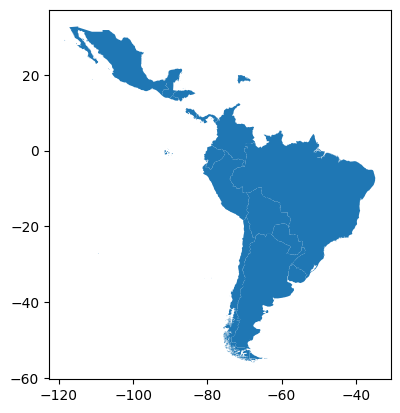

In [ ]:
lat_merged.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

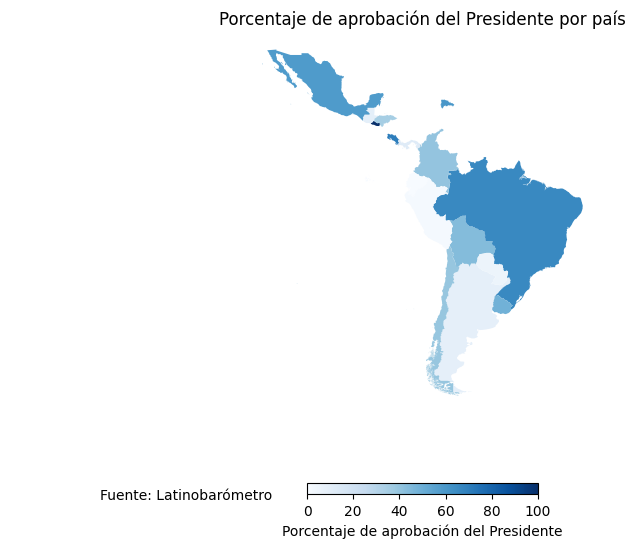

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,6))
lat_merged.plot(column = "Aprueba", ax=ax,
                 cmap = "Blues")
ax.axis("off")
ax.set_title("Porcentaje de aprobación del Presidente por país")
ax.annotate("Fuente: Latinobarómetro",
            xy = (0.1, 0.1), xycoords = "figure fraction",
            horizontalalignment = "left",
            verticalalignment = "top")

# Leyenda
sm = plt.cm.ScalarMappable(cmap = "Blues",
                           norm = plt.Normalize(vmin=0,
                                                vmax=100))

# Vacío para el data range

sm._A = []

# Añadimos la barra de colores

cbar = fig.colorbar(sm, label = "Porcentaje de aprobación del Presidente", ax=ax,
                    orientation ="horizontal",
                    fraction=0.025)

plt.show

### Referencias para mapas geniales:

https://www.data-to-viz.com/

https://python-graph-gallery.com/

https://matplotlib.org/stable/users/explain/colors/colormaps.html
